# ds4bio ml-a: Introductory Machine Learning (Part a)
### Data Science for Biology

**Notebook developed by** *Teja Kalakota, Amber Jiang*

**Supervised by** *Steven E Brenner*

**Adapted from work by** *Phillip Compeau, Kinsey Long, Max Staller, Jonathan Fischer, and Sarp Dora Kurtoglu*

## Learning Outcomes
In this notebook, you will learn about:
- Supervised and unsupervised machine learning
- Training and testing data
- K-Nearest Neighbors Classifiers
- K-Means Clustering
- Evaluating classification models
- Using sklearn, scikit-learn

### Helpful Data Science Resources
Here are some resources you can check out while doing this notebook!

- [Introductory documentation for pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [sklearn documentation](https://scikit-learn.org/stable/)
- [Interactive K-means Clustering Demo](http://alekseynp.com/viz/k-means.html)

### Peer Consulting

If you find yourself having trouble with any content in this notebook, Data Peer Consultants are an excellent resource! Click [here](https://dlab.berkeley.edu/training/frontdesk-info) to locate live help.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world, or other data science courses offered at Berkeley.

## Introduction
### Supervised and Unsupervised Classification Models
Machine learning is a branch of artificial intelligence that focuses on the
development of algorithms and models that enable computers to learn from data
and make predictions or decisions without being explicitly programmed. In
essence, it allows systems to improve their performance over time through
experience, adjusting their parameters based on the information provided to
them. Machine learning encompasses a variety of techniques, including
classification, regression, clustering, and more, with the overarching goal of
extracting meaningful patterns and insights from data.

In this lab we will use the scikit-learn library, sklearn, to perform machine learning exercises.  The lab will guide you to the key objects and functions to use, and you will often need to look up the exact syntax for them in the scikit-learn documentation.


In [1]:
# JUST RUN THIS CELL :)
from datascience import *
import numpy as np
import seaborn as sns
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

### Dataset
In this lab, we will use machine learning methods to learn about a famous iris flower dataset. This dataset, containing three different flower species, was put together by Edgar Anderson and was used by Ronald Fisher to present the idea of classification for the first time in 1936. 

<font color = #d14d0f>**QUESTION 1A**:</font> Let's first import the data as a dataframe and store it in the `iris` variable. (The data was taken from the University of California, Irvine Machine Learning Repository). Drop the first column because it is a duplicate of the index column.

Display the first 10 rows of the data frame as a cell output.

In [11]:
# YOUR CODE HERE
iris = pd.read_csv("./data/iris.csv")
iris.drop(columns=['Unnamed: 0'], inplace=True)
iris.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<font color = #d14d0f>**QUESTION 1B**:</font> Briefly explore the iris dataset, and provide the following information:
1. The columns and the data type of each column 
2. What measurements (features) are available for each flower
3. How many samples belong to each species. 

Summarize your results in the text box.


In [12]:
# YOUR CODE HERE
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [17]:
type(iris['Species'].iloc[0])

str

In [18]:
iris.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64

**Summary:**
1. The Sepal length, Sepal width, Petal length, petal width is a float64 object but the species column is a string object
2. As stated above, we have the Sepal length, Sepal width, Petal length and Petal width
3. There are 50 samples for each species

### Data Visualization 
Now we will explore the data visually.  

First, run the cells below to generate descriptive data, bar plots, violin plots, and smoothed distributions of the flower’s features. Even though the code is provided, please strive to understand the operations they are performing.

In [19]:
# JUST RUN THIS CELL :)
iris_summary = iris.drop("Species", axis=1).astype(float)
iris_summary.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
# JUST RUN THIS CELL :)
Iris_setosa=iris.loc[iris["Species"]=="Iris-setosa"]
Iris_virginica=iris.loc[iris["Species"]=="Iris-virginica"]
Iris_versicolor=iris.loc[iris["Species"]=="Iris-versicolor"]

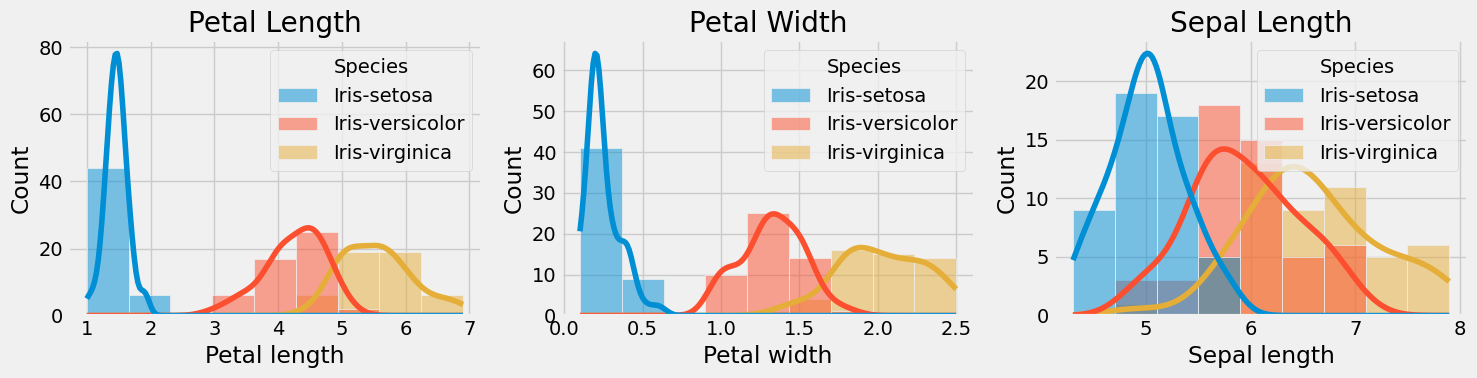

In [21]:
# JUST RUN THIS CELL :)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Petal length
sns.histplot(data=iris, x="Petal length", hue="Species", kde=True, ax=axes[0])
axes[0].set_title("Petal Length")

# Petal width
sns.histplot(data=iris, x="Petal width", hue="Species", kde=True, ax=axes[1])
axes[1].set_title("Petal Width")

# Sepal length
sns.histplot(data=iris, x="Sepal length", hue="Species", kde=True, ax=axes[2])
axes[2].set_title("Sepal Length")

plt.tight_layout()
plt.show()

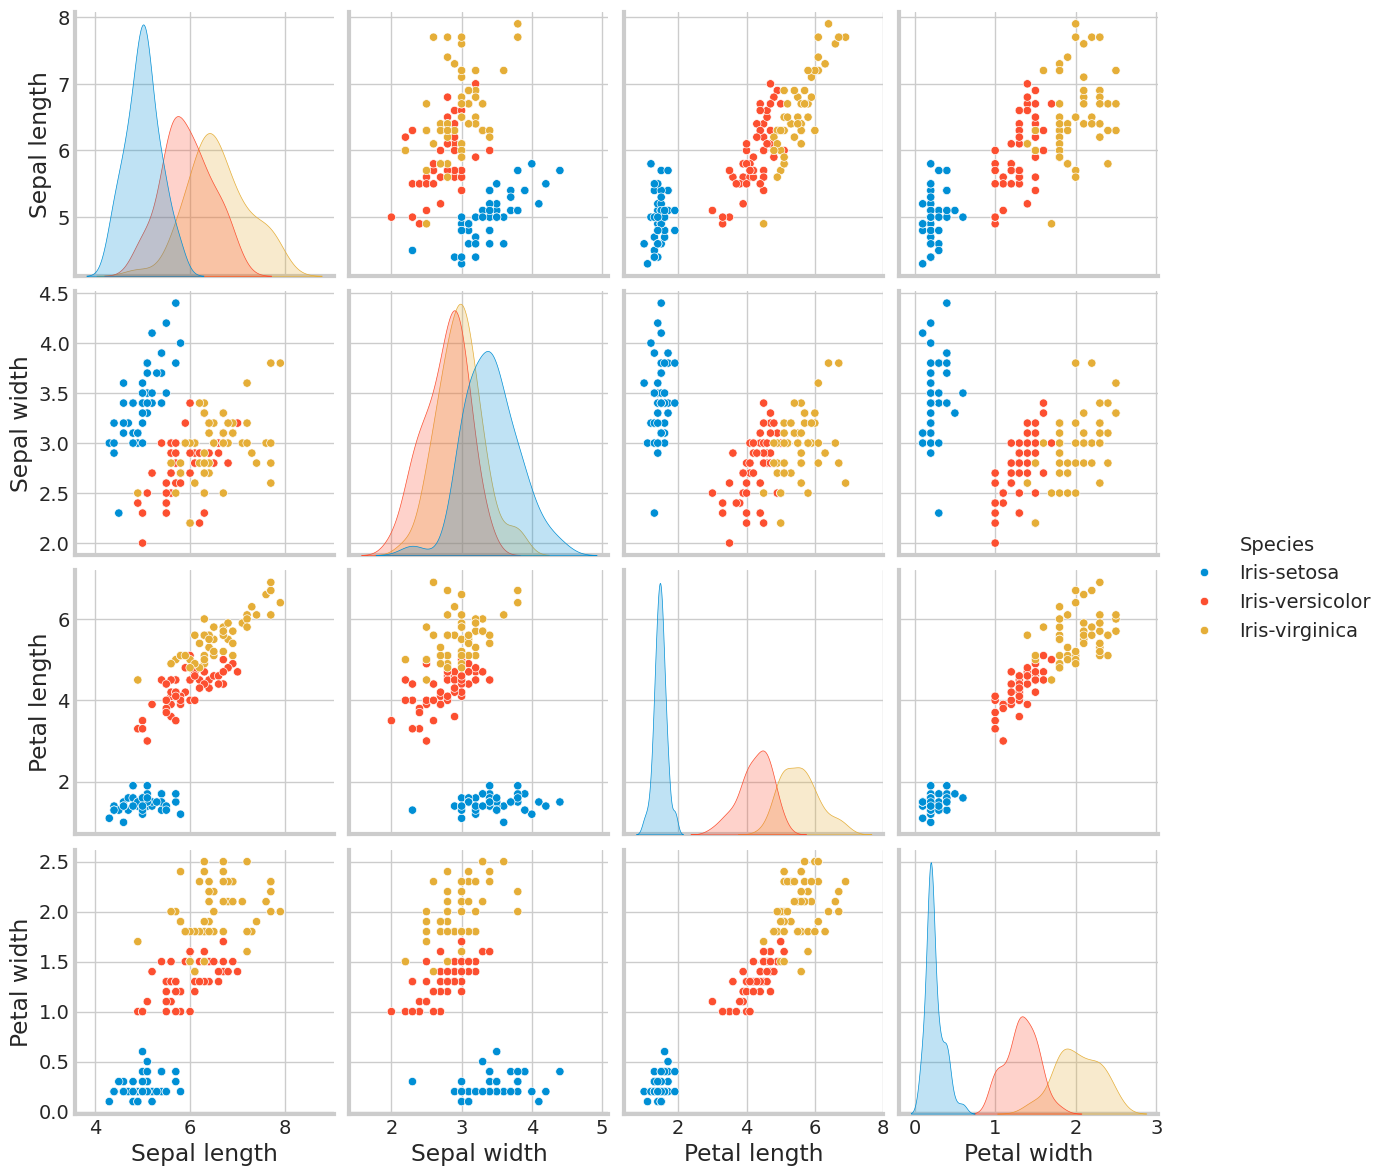

In [22]:
# JUST RUN THIS CELL :)
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Species",height=3);
plt.show()

Text(0.5, 1.0, 'Sepal Width by Species')

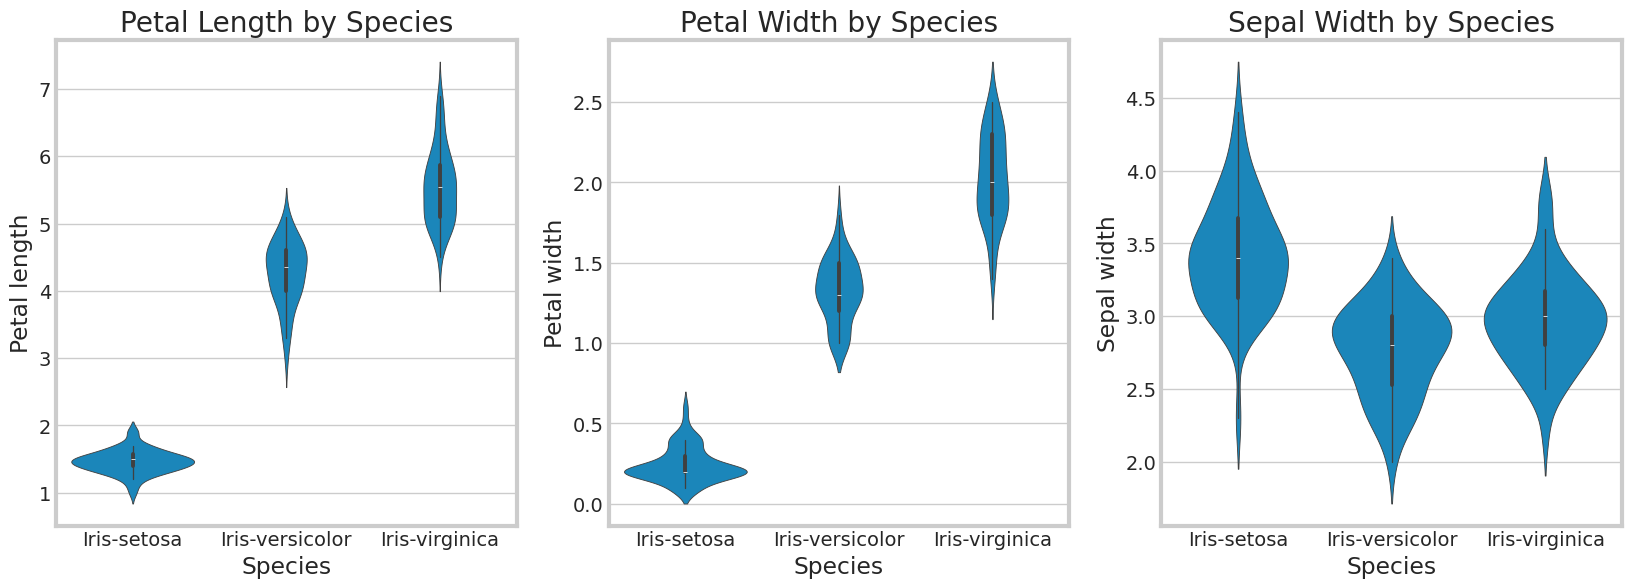

In [23]:
# JUST RUN THIS CELL :)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Violin plot for Petal Length
sns.violinplot(x="Species", y="Petal length", data=iris, ax=axes[0])
axes[0].set_title("Petal Length by Species")

# Violin plot for Petal Width
sns.violinplot(x="Species", y="Petal width", data=iris, ax=axes[1])
axes[1].set_title("Petal Width by Species")

# Violin plot for Sepal Width
sns.violinplot(x="Species", y="Sepal width", data=iris, ax=axes[2])
axes[2].set_title("Sepal Width by Species")

<font color = #d14d0f>**QUESTION 1C**:</font> Now you will plot all flowers in the iris dataset in a simple scatterplot according to their septal length and septal widths. Plot the septal lengths on the x-axis. Assign the data points for each species to a different color. Hint: Use 3 `plt.scatter()` functions, one for each species. Don't forget to title your plot, axes, and legend.

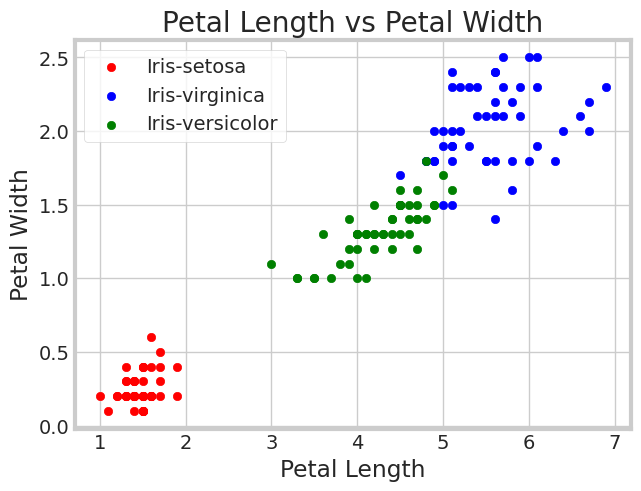

In [31]:
# YOUR CODE HERE
plt.scatter(Iris_setosa['Petal length'], Iris_setosa['Petal width'], color='red', label='Iris-setosa')
plt.scatter(Iris_virginica['Petal length'], Iris_virginica['Petal width'], color='blue', label='Iris-virginica')
plt.scatter(Iris_versicolor['Petal length'], Iris_versicolor['Petal width'], color='green', label='Iris-versicolor')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

You should see that flowers with smaller petal width and length are easily identifiable as the setosa species. In contrast, determining whether a flower is versicolor or virginica is a harder task as the data points are not as easily separable.

<font color = #d14d0f>**QUESTION 1D**:</font> 

Carefully examine the distribution plots above comparing petal length, petal width, and sepal length across the three Iris species (Setosa, Versicolor, Virginica). Each plot displays how these features vary within and between species.

Using your observations, describe how well-separated the species appear to be for each feature. Which feature shows the clearest distinction among species, and which shows the most overlap? Consider how this would affect your ability to classify a new, unlabeled flower based on these features.

If you were tasked with predicting the species of a flower using only two features, which would you choose and why? Support your reasoning with specific visual patterns from the plots, and reflect on how similarity or overlap in feature values could influence how easily or accurately new data points might be categorized.



**Answer:**
I mainly looked at the diagonal distributions between each feature which would give me a sense for how much overlap there is. We can see that petal width and petal length have very clear distinctions while sepal width and sepal length has a lot of overlap. Intuitively having features with large overlap is going to make it difficult to efficiently categorize the species into the 3 bins. So I had to use two features, for this reason I would go with petal width and petal length.

### Unsupervised Machine Learning

There are two types of machine learning: supervised and unsupervised. We will start by looking at unsupervised machine learning. 

Unsupervised machine learning is used to uncover inherent structures or relationships within unlabeled data. The primary objective of unsupervised learning is to explore and uncover hidden patterns or structures within the data. This could involve tasks such as clustering similar data points together, reducing the dimensionality of the dataset while preserving essential information, or detecting anomalies or outliers. In unsupervised machine learning, there are no explicit target variables or class labels to guide the learning process. Instead, the algorithm aims to identify inherent patterns, structures, or relationships within the data without external guidance.

Clustering is a fundamental technique in unsupervised machine learning that involves grouping similar data points together based on certain features or characteristics, without prior knowledge of class labels. The goal of clustering is to partition a dataset into clusters, where data points within the same cluster are more similar to each other than they are to data points in other clusters. Various algorithms, such as K-means, hierarchical clustering, and DBSCAN, are employed to achieve this task, each with its own approach to defining similarity and partitioning the data. Clustering finds wide application across diverse domains, including social network analysis, customer segmentation, and image processing, where it is used to discover underlying structures, identify patterns, and gain insights from large and complex datasets.

In the realm of biology, where the complexity of biological systems often surpasses our comprehension, unsupervised machine learning emerges as a powerful tool for unraveling relationships within vast datasets without explicit guidance or labeled examples. In this lab, we will be using the K-means clustering methods with [`sklearn`](https://scikit-learn.org/) to look at patterns in our iris data set. 

### K-means Clustering Algorthim 
K-means is an algorithm used to group data into k clusters. It works by trying to minimize the distance between data points and the center of the cluster (aka the centroid) they belong to. While our iris data set has predetermined species labels, we ignore this part for now, and aim to find patterns or groupings. In the provided code below, we drop the species column.

In [32]:
# JUST RUN THIS CELL :)
Kmean_iris_data = iris.drop('Species', axis=1) 
Kmean_iris_data.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Scaling features**

k-Means clustering relies on distance calculations — typically Euclidean distance — to assign points to the nearest cluster centroid. While our feature are not on different scales, this can become a problem if they are. The algorithm will give end up giving more weight to features with larger ranges, which can distort the clustering results. Sklearn has a tool called `StandardScaler` which standardizes features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as follows: 
**z = (x - u) / s**.

- z is the standard score (also called a z-score)
- x is the original value of the feature for a particular sample
- u is the mean of the training samples
- s is the standard deviation of the training samples

Below, we show you how to use `StandardScaler` from `sklearn.preprocessing` to scale the numeric features of the Iris dataset. We store the scaled data in a new variable called **scaled_data**.

In [47]:
# JUST RUN THIS CELL :)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Kmean_iris_data)

<font color = #d14d0f>**QUESTION 2A**:</font> 

A characteristic of the k-means method is that you must choose the number of clusters in advance. We know that there are actually 3 species of flowers, so 3 would be a good choice of k for this dataset. But, what if we didn’t know the number of flower species? For multidimensional data this can be difficult to figure out.  

Try running k-means on our dataset with a K of 6. Use the `KMeans` class from scikit-learn to create a model that groups the iris data into the 6 clusters. Fit the model to
your scaled dataset to learn the cluster centers and assign each point to a cluster.  

We do this step for you, but please follow along with the description.

To do this, you first need to create a `kmeans` object, for which we’ve provided the relevant code line. We use the parameter `init=k-means++`, which is an efficient way to pick initial points for the centroids; after first picking one at random, then selecting the next ones with higher probability given to points that are farther away from existing centroids — helping to spread them out for better clustering.  We’ve chosen `random_state=42` so that your results will be deterministic, otherwise there is a randomness in the process.  

After setting up the object, run `kmeans.fit` on your scaled data.

In [48]:
# JUST RUN THIS CELL :)
kmeans = KMeans(n_clusters=6, init = 'k-means++', random_state=42, n_init = 10)
kmeans.fit(scaled_data)

KMeans(n_clusters=6, n_init=10, random_state=42)

<font color = #d14d0f>**QUESTION 2B**:</font> 
Now we’ll look to see what these clusters look like using just 2 of the features.  Once you've fitted the K-Means model to your scaled iris data, each data point has been assigned to a cluster based on its similarity to others. These clusters are stored in `kmeans.labels_`.

Make a scatterplot like the one in question 1C, but use the scaled petal width and length and color according to the labels. 

Looking at the data, you can see that 6 doesn’t seem like an obvious number for K.   There are heuristics to help do it better. 

In [ ]:
scaled_data.dtype

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

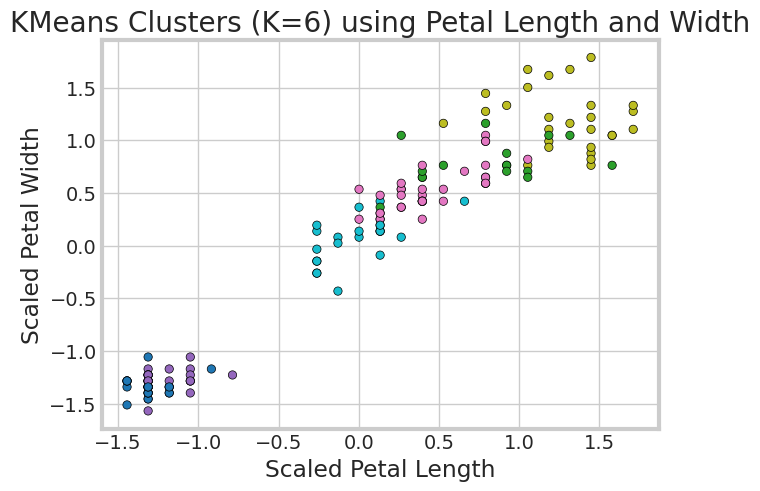

In [38]:
# YOUR CODE HERE
plt.scatter(
    # the next two lines will set your features (petal width and length) and therefore axes
    scaled_data[:, 3], # becomes x axis
    scaled_data[:, 2], # becomes y axis
    c=kmeans.labels_,
    # the next two lines specifies colors for the plot
    cmap="tab10", # a default color set
    edgecolor="k" # adds borders to the dots
)
plt.xlabel("Scaled Petal Length")
plt.ylabel("Scaled Petal Width")
plt.title("KMeans Clusters (K=6) using Petal Length and Width")
plt.show()

<font color = #d14d0f>Bonus 1:</font> plot all scatterplots of the different flower features, using the approaches in the introduction, and coloring by k. This is extra credit.

In [ ]:
# OPTIONAL YOUR CODE HERE (BONUS FOR 2B)

***The Elbow Method***

To help make this decision on what K should be, we use a visual technique called the Elbow Method: 
🔗 [The Elbow Method - Medium article](https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189)

The Elbow Method works by calculating something called the **Within-Cluster Sum of Squares (WCSS)** for a range of K values.  

WCSS measures the total squared distance between each point and the centroid of its assigned cluster.

The formula is:

$$
\text{WCSS} = \sum_{j=1}^{k} \sum_{x_i \in C_j} \| x_i - \mu_j \|^2
$$

The ideal number of clusters is a balance between simplicity and performance. The WCSS (also referred to as **inertia** in scikit-learn) always decreases as K increases - you generally have more compact groups with more clusters, but there’s a point where adding more clusters doesn’t improve things much. This point is also called the elbow in our curve where increasing the k value doesn't necessarily decrease our inertia.

<font color = #d14d0f>**QUESTION 2C**:</font> Write a for loop to iterate a list called **inertia** of WCSS values for different k values from 1 (just one big cluster) to 11.  You do this by running `kmeans.fit` repeatedly on the scaled data for each k, and then looking at the `kmeans.inertia_` for each k and saving to the inertia list.  So, the first element of inertia is the WCSS for k=1, and the 11th element is for k=11.

In [44]:
# YOUR CODE HERE
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

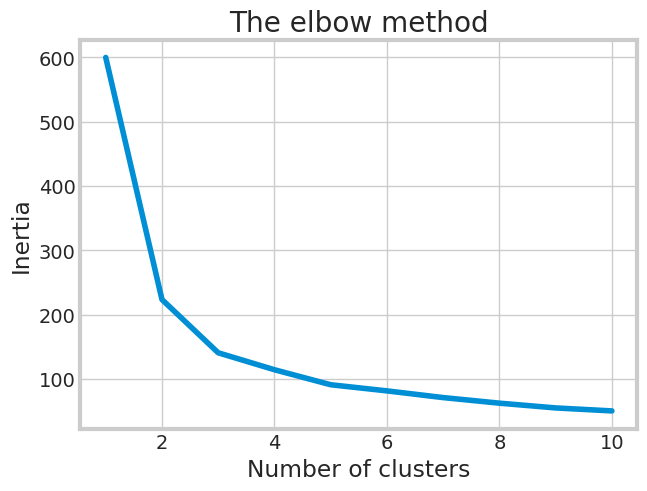

In [45]:
# JUST RUN THIS CELL :)
# This cell plots the inertias for different k clusters
plt.plot(range(1, 11), inertia)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') #within cluster sum of squares
plt.show()

<font color = #d14d0f>**QUESTION 2D**:</font> 
Where does the elbow appear to be to you?  Does this agree with your intuition?

**Answer**
My intuition is that we should have 3 clusters since we have 3 classes and that should be enough. From the elbow method it does look like 3 would be a solid number of clusters though oddly enough I would argue we could stretch the number of clusters more than 

<font color = #d14d0f>Bonus 2:</font> write code to also show how the data look when clustered using different K’s, using scatterplots or other images. Bonus 1 only specified using 6 clusters.

In [ ]:
# OPTIONAL YOUR CODE HERE (BONUS FOR 2C)

<font color = #d14d0f>**QUESTION 2E**:</font> Now that you've scaled the features and explored the Elbow Method to choose an appropriate number of clusters, it's time to apply and use the KMeans class from sklearn to create a model that groups the scaled iris data into the appropriate number of clusters. We will do the step of fitting the model to your scaled dataset for you (next cell). This step learns the cluster centers and assigns each point to a cluster. 

In [49]:
# YOUR CODE HERE
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, n_init=10, random_state=42)

Now add the cluster assignments to the original `iris` DataFrame as a new column called 'cluster'. We do this step for you. After fitting the K-Means model to the scaled data, you can assign the resulting cluster labels to the original (prescaled) DataFrame. This approach allows you to analyze and interpret the clustering results in the context of the original feature values, facilitating meaningful insights and comparisons.

In [50]:
# JUST RUN THIS CELL :)
iris['cluster'] = kmeans.labels_

# Take a look at what the original dataframe looks like now
iris

,Sepal length,Sepal width,Petal length,Petal width,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


# Machine Learning (Part a) Complete
We hope you had fun! Please await to hear instructions about the second part of the lab. We apologize for the delay, as the team has been struggling with illness and travel. The gradescope submission will be open when both parts of the lab have been released.